## Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
import sys
from pathlib import Path

# Agregar la carpeta raíz al path para poder importar
carpeta_raiz = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(carpeta_raiz))

# Importar las funciones
from funciones_save_load import guardar_parquet, cargar_parquet

# Usar las funciones
icfes = cargar_parquet("icfes.parquet")
icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
392680,CC,COLOMBIA,M,1999 Feb 10 12:00:00 AM,20204,SB11202040564216,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,5.0,ENVIGADO,5266.0,Estrato 3,5 a 6,Cuatro,Educación profesional completa,Educación profesional incompleta,No sabe,No sabe,Si,Si,No,Si,No,Si,Si,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Mejor,Entre 1 y 2 horas,Más de 3 horas,0,No,74963,305266002071,COLEGIO DE CAPACITACIÓN DE ENVIGADO,MIXTO,NO OFICIAL,A,N,ACADÉMICO,305266002071,COLEGIO DE CAPACITACIÓN DE ENVIGADO,S,URBANO,SABATINA,5266,ENVIGADO,5,ANTIOQUIA,N,5266.0,ENVIGADO,ANTIOQUIA,5.0,63,87,3,52,53,3,39,23,1,54,68,2,38.0,20,A-,255,57,61.218535,3.0,3.0,PUBLICAR,NO
229850,TI,COLOMBIA,M,2004 Jan 20 12:00:00 AM,20204,SB11202040248407,ESTUDIANTE,COLOMBIA,No,NORTE SANTANDER,54.0,CÚCUTA,54001.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,726661,154001011470,I.E. SAN JOSÉ - EL TRIGAL,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,154001011470,I.E. SAN JOSÉ - EL TRIGAL - SEDE PRINCIPAL,S,URBANO,UNICA,54001,CÚCUTA,54,NORTE SANTANDER,N,54001.0,CÚCUTA,NORTE SANTANDER,54.0,58,72,3,60,77,3,57,80,3,66,93,3,46.0,53,A-,296,83,NaN,NaN,2.0,PUBLICAR,GENERACION E - GRATUIDAD
446189,CC,COLOMBIA,F,2000 Dec 04 12:00:00 AM,20204,SB11202040232567,ESTUDIANTE,COLOMBIA,No,CUNDINAMARCA,25.0,MOSQUERA,25473.0,Estrato 3,3 a 4,Tres,Técnica o tecnológica completa,Secundaria (Bachillerato) incompleta,"Es dueño de un negocio grande, tiene un cargo ...",Es vendedor o trabaja en atención al público,Si,Si,Si,Si,Si,Si,No,Si,11 A 25 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Mejor,No leo por entretenimiento,Más de 3 horas,Menos de 10 horas,"Si, en efectivo",108662,325286000899,COL GIMN AMERICANO,MIXTO,NO OFICIAL,A,N,ACADÉMICO,325286000899,COL GIMN AMERICANO,S,URBANO,MAÑANA,25286,FUNZA,25,CUNDINAMARCA,N,25473.0,MOSQUERA,CUNDINAMARCA,25.0,63,85,3,56,66,3,50,58,2,49,54,2,50.0,69,A1,271,68,59.331220,3.0,3.0,PUBLICAR,NO
424738,TI,COLOMBIA,F,2004 Jun 10 12:00:00 AM,20204,SB11202040092451,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,5.0,MEDELLÍN,5001.0,Estrato 3,5 a 6,Tres,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Es dueño de un negocio pequeño (tiene pocos em...,Es dueño de un negocio pequeño (tiene pocos em.

## 1. Analisis Inicial de Datos

### 1.1 Dimensiones del Dataset

In [3]:
#=======================================
# DIMENSIONES DEL DATASET
#=======================================

print(f'El dataset tiene un total de {icfes.shape[0]} filas y {icfes.shape[1]} columnas')
print(icfes.shape)

El dataset tiene un total de 504872 filas y 81 columnas
(504872, 81)


### 1.2 Eliminar Variables Inútiles

In [4]:
icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_PAIS_RESIDE,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
429420,TI,COLOMBIA,F,2003 Nov 12 12:00:00 AM,20204,SB11202040013119,ESTUDIANTE,COLOMBIA,No,BOGOTÁ,11.0,BOGOTÁ D.C.,11001.0,Estrato 2,1 a 2,Seis o mas,Educación profesional completa,Técnica o tecnológica completa,"Trabaja como profesional (por ejemplo médico, ...",Tiene un trabajo de tipo auxiliar administrati...,Si,Si,Si,Si,Si,No,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,Entre 11 y 20 horas,"Si, en efectivo",145466,311001065152,COL COLOMBO INTERNACIONAL ACOINPREV,MIXTO,NO OFICIAL,A,None,ACADÉMICO,311001065152,COL COLOMBO INTERNACIONAL ACOINPREV,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001.0,BOGOTÁ D.C.,BOGOTÁ,11.0,55,59,3,45,31,2,47,49,2,48,51,2,49.0,66,A1,244,49,64.391635,4.0,3.0,PUBLICAR,NO
382597,CC,COLOMBIA,F,2002 Jun 17 12:00:00 AM,20204,SB11202040445370,ESTUDIANTE,COLOMBIA,No,ANTIOQUIA,5.0,BELLO,5088.0,Estrato 4,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Educación profesional incompleta,No sabe,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,No,No,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,1 o 2 veces por semana,Igual,Entre 30 y 60 minutos,Entre 30 y 60 minutos,0,No,664128,105088800016,INSTITUCION EDUCATIVA BETSABÉ ESPINAL,MIXTO,OFICIAL,A,None,None,105088800016,INSTITUCION EDUCATIVA BETSABÉ ESPINAL - SEDE P...,S,URBANO,MAÑANA,5088,BELLO,5,ANTIOQUIA,N,5088.0,BELLO,ANTIOQUIA,5.0,49,39,2,43,25,2,29,2,1,39,27,1,41.0,34,A-,200,18,59.457061,3.0,3.0,PUBLICAR,NO
31068,TI,COLOMBIA,F,2004 Mar 21 12:00:00 AM,20204,SB11202040071724,ESTUDIANTE,COLOMBIA,No,LA GUAJIRA,44.0,RIOHACHA,44001.0,Estrato 2,5 a 6,Tres,Educación profesional completa,Técnica o tecnológica completa,Es operario de máquinas o conduce vehículos (t...,"Trabaja en el hogar, no trabaja o estudia",No,Si,No,No,Si,Si,No,No,0 A 10 LIBROS,Todos o casi todos los días,1 o 2 veces por semana,1 o 2 veces por semana,Peor,30 minutos o menos,Entre 1 y 3 horas,0,No,659490,144001001941,INSTITUCION EDUCATIVA HELION PINEDO RIOS,MIXTO,OFICIAL,A,N,ACADÉMICO,144001001941,HELION PINEDO RIOS,S,URBANO,NOCHE,44001,RIOHACHA,44,LA GUAJIRA,N,44001.0,RIOHACHA,LA GUAJIRA,44.0,57,66,3,54,59,3,54,71,2,54,68,2,33.0,5,A-,265,64,49.077794,2.0,2.0,PUBLICAR,NO
337331,TI,COLOMBIA,M,2003 May 27 12:00:00 AM,2

In [5]:
icfes.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_TIENEETNIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE',
       'ESTU_COD_RESIDE_MCPIO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_CODIGO_ICFES',


In [6]:
vars_eliminar = ['PERIODO', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 
                 'ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO',
                 'COLE_CODIGO_ICFES', 'COLE_COD_DANE_ESTABLECIMIENTO', 'ESTU_PAIS_RESIDE',
                 'COLE_NOMBRE_ESTABLECIMIENTO', 'COLE_COD_DANE_SEDE', 'COLE_NOMBRE_SEDE',
                 'COLE_COD_MCPIO_UBICACION', 'COLE_MCPIO_UBICACION', 'COLE_COD_DEPTO_UBICACION', 
                 'COLE_DEPTO_UBICACION', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION',
                 'ESTU_COD_DEPTO_PRESENTACION','PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA',
                 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES',
                 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PERCENTIL_INGLES', 'DESEMP_INGLES',
                 'PERCENTIL_GLOBAL', 'ESTU_ESTADOINVESTIGACION', 'ESTU_GENERACION-E']

icfes.drop(vars_eliminar, axis=1, inplace=True)

print(f"Columnas después de eliminar: {icfes.shape[1]}")
icfes.sample(5)

Columnas después de eliminar: 48


,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
236182,TI,COLOMBIA,M,2001 Jul 07 12:00:00 AM,No,Estrato 1,3 a 4,Uno,Primaria incompleta,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",No,No,No,No,No,No,Si,No,0 A 10 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Igual,30 minutos o menos,30 minutos o menos,Menos de 10 horas,No,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,URBANO,UNICA,NEIVA,HUILA,44,36,42,30,43.0,192,36.397189,1.0,2.0
319993,TI,COLOMBIA,M,2004 Mar 04 12:00:00 AM,No,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Trabaja por cuenta propia (por ejemplo plomero...,Si,Si,Si,Si,No,No,No,No,MÁS DE 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Peor,Entre 1 y 2 horas,Más de 3 horas,0,No,MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,UNICA,BOGOTÁ D.C.,BOGOTÁ,69,72,71,79,79.0,366,53.327927,3.0,3.0
64167,TI,COLOMBIA,F,2003 May 31 12:00:00 AM,No,Estrato 2,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,UNICA,ARMENIA,QUINDIO,42,46,40,50,44.0,222,41.999283,2.0,3.0
113212,TI,COLOMBIA,M,2004 May 29 12:00:00 AM,No,Estrato 3,1 a 2,Dos,Educación profesional incompleta,Educación profesional completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como profesional (por ejemplo médico, ...",Si,Si,Si,Si,Si,No,No,No,26 A 100 LIBROS,3 a 5 veces por semana,1 o 2 veces por semana,3 a 5 veces por semana,Igual,Entre 1 y 2 horas,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,UNICA,BARRANQUILLA,ATLANTICO,66,63,70,70,52.0,330,60.863958,3.0,3.0
66768,CC,COLOMBIA,M,2002 Jan 06 12:00:00 AM,No,Estrato 2,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...",Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,Si,Si,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,Entre 30 y 60 minutos,30 minutos o menos,0,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,UNICA,BOGOTÁ D.C.,BOGOTÁ,48,57,58,61,47.0,277,61.233112,3.0,3.0


In [7]:
icfes.shape

(504872, 48)

In [8]:
resumen = icfes.dtypes.value_counts().reset_index()
resumen.columns = ['Tipo de dato', 'Cantidad de columnas']
resumen = resumen.sort_values(by='Cantidad de columnas')
print(resumen.to_string(index=False))

Tipo de dato  Cantidad de columnas
     float64                     4
       int64                     5
      object                    39


### 1.3 Tipos de Datos Asignados

In [9]:
# Numéricas
num_vars = icfes.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nVariables numéricas:", len(num_vars))
print(num_vars)

# Categóricas
cat_vars = icfes.select_dtypes(include=["object"]).columns.tolist()
print("\nVariables categóricas:", len(cat_vars))
print(cat_vars)

# Booleanas
bools_vars = icfes.select_dtypes(include=["bool"]).columns.tolist()
print("\nVariables booleanas:", len(bools_vars))
print(bools_vars)

# Fechas
fecha_vars = icfes.select_dtypes(include=["datetime"]).columns.tolist()
print("\nVariables de tipo fecha:", len(fecha_vars))
print(fecha_vars)


Variables numéricas: 9
['PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_ESTABLECIMIENTO']

Variables categóricas: 39
['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA', 'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA', 'ESTU_TIPOREMUNERACION', 'COLE_GENERO', 'COLE_NATURALEZA', 'COL

In [10]:
# Extrae solo los primeros 4 caracteres (el año)
icfes['ESTU_FECHANACIMIENTO'] = pd.to_numeric(
    icfes['ESTU_FECHANACIMIENTO'].str[:4], 
    errors='coerce'
)

icfes.sample(6)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_TIENEETNIA,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO
173305,TI,COLOMBIA,F,2004,No,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,"Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,Si,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Igual,No leo por entretenimiento,Más de 3 horas,0,No,MIXTO,OFICIAL,A,None,NO APLICA,S,URBANO,UNICA,PEREIRA,RISARALDA,48,44,34,38,41.0,205,51.353848,3.0,2.0
122748,TI,COLOMBIA,F,2003,No,Estrato 3,5 a 6,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...","Trabaja en el hogar, no trabaja o estudia",No,No,Si,Si,Si,No,No,Si,11 A 25 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 1 y 3 horas,0,No,MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ,74,79,74,75,83.0,380,50.351965,2.0,3.0
332679,TI,COLOMBIA,M,2003,No,Estrato 1,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Primaria incompleta,Es dueño de un negocio pequeño (tiene pocos em...,"Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,Si,Si,Si,Si,Si,26 A 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Mejor,30 minutos o menos,30 minutos o menos,Menos de 10 horas,No,MIXTO,OFICIAL,A,None,ACADÉMICO,S,URBANO,MAÑANA,VILLAVICENCIO,META,49,33,36,38,33.0,193,58.405365,3.0,2.0
192095,TI,COLOMBIA,F,2004,No,Estrato 1,5 a 6,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Trabaja como personal de limpieza, mantenimien...","Trabaja como personal de limpieza, mantenimien...",Si,Si,Si,Si,Si,No,Si,No,26 A 100 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Mejor,30 minutos o menos,Más de 3 horas,0,No,MIXTO,OFICIAL,A,N,TÉCNICO,N,URBANO,UNICA,FLORIDA,VALLE,63,48,60,60,64.0,291,53.799044,3.0,3.0
39671,CC,COLOMBIA,F,1999,No,Estrato 2,3 a 4,Tres,Primaria incompleta,Primaria incompleta,Es dueño de un negocio pequeño (tiene pocos em...,Es vendedor o trabaja en atención al público,Si,Si,Si,No,No,No,Si,No,0 A 10 LIBROS,3 a 5 veces por semana,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,Más de 30 horas,"Si, en efectivo",MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,S,RURAL,MAÑANA,LA UNIÓN,NARIÑO,47,32,36,32,37.0,184,47.417961,2.0,1.0
11377,TI,COLOMBIA,M,2003,No,Estrato 2,3 a 4,Tres,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,No,Si,No,0 A 10 LIBROS,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Peor,Entre 30 y 60 minutos,Entre 1 y 3 horas,Entre 11 y 20 horas,No,MIXTO,OFICIAL,A,N,ACADÉMICO,S,URBANO,MAÑANA,PEREIRA,RISARALDA,55,64,56,46,38.0,270,58.362500,3.0,3.0


### 1.4 Valores Faltantes

#### Número de filas con al menos un valor faltante

In [11]:
filas_con_na = icfes.isna().any(axis=1).sum()
print(f'El dataset tiene {filas_con_na:,} filas que contienen al menos un valor nulo ({filas_con_na/icfes.shape[0]:.1%} del total)')

El dataset tiene 133,046 filas que contienen al menos un valor nulo (26.4% del total)


#### Número de filas con más del 25% de datos faltantes

In [12]:
# Conteo de NA por fila
filas_na = icfes.isna().sum(axis=1)

# Umbral: más del 25% de las columnas con NA
umbral = icfes.shape[1] * 0.4
incompletas = icfes[filas_na > umbral]

print(f"Filas con más del 40% de valores faltantes: {len(incompletas):,} de {len(icfes):,}")
print(f"Porcentaje de filas incompletas: {len(incompletas)/len(icfes):.2%}")

Filas con más del 40% de valores faltantes: 12,719 de 504,872
Porcentaje de filas incompletas: 2.52%


#### Conteo y Proporción de valores faltantes por variable categórica

In [13]:
conteo_na = icfes.isna().sum()
conteo_na = conteo_na[conteo_na > 0]

na_porcentaje = round((conteo_na / len(icfes)* 100),2)

na_df = pd.DataFrame({'Variable': conteo_na.index, 'Conteo': conteo_na.values, 'Porcentaje': na_porcentaje.values})

na_df = na_df.sort_values(by = 'Porcentaje', ascending = False)
na_df

,Variable,Conteo,Porcentaje
26,COLE_BILINGUE,83007,16.44
20,FAMI_COMECEREALFRUTOSLEGUMBRE,20263,4.01
11,FAMI_TIENECOMPUTADOR,20194,4.00
7,FAMI_TRABAJOLABORPADRE,19691,3.90
14,FAMI_TIENEAUTOMOVIL,17809,3.53
25,ESTU_TIPOREMUNERACION,17646,3.50
8,FAMI_TRABAJOLABORMADRE,17599,3.49
16,FAMI_TIENECONSOLAVIDEOJUEGOS,17478,3.46
13,FAMI_TIENEHORNOMICROOGAS,17142,3.40
15,FAMI_TIENEMOTOCICLETA,17086,3.38


In [14]:
# Inicializar listas vacías
cat_nulos = []
num_nulos = []

# Recorrer todas las columnas del DataFrame
for col in icfes.columns:
    n_nulos = icfes[col].isna().sum()
    
    if n_nulos > 2000:
        if icfes[col].dtype in ['object', 'category']:
            cat_nulos.append((col, n_nulos))
        elif pd.api.types.is_numeric_dtype(icfes[col]):
            num_nulos.append((col, n_nulos))

# Convertir a DataFrame para mejor visualización y ordenarlos
cat_nulos_df = pd.DataFrame(cat_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)
num_nulos_df = pd.DataFrame(num_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)

# Imprimir resultados
print(f"\nVariables Categóricas con más de 2000 valores nulos: {len(cat_nulos_df)}")
print(cat_nulos_df.to_string(index=False))

print(f"\nVariables Numéricas con más de 2000 valores nulos: {len(num_nulos_df)}")
print(num_nulos_df.to_string(index=False))


Variables Categóricas con más de 2000 valores nulos: 27
                     Variable  Nulos
                COLE_BILINGUE  83007
FAMI_COMECEREALFRUTOSLEGUMBRE  20263
         FAMI_TIENECOMPUTADOR  20194
       FAMI_TRABAJOLABORPADRE  19691
          FAMI_TIENEAUTOMOVIL  17809
        ESTU_TIPOREMUNERACION  17646
       FAMI_TRABAJOLABORMADRE  17599
 FAMI_TIENECONSOLAVIDEOJUEGOS  17478
     FAMI_TIENEHORNOMICROOGAS  17142
        FAMI_TIENEMOTOCICLETA  17086
      ESTU_HORASSEMANATRABAJA  16984
         FAMI_ESTRATOVIVIENDA  16952
      FAMI_SITUACIONECONOMICA  16314
           FAMI_TIENELAVADORA  16232
            FAMI_CUARTOSHOGAR  15839
         FAMI_TIENESERVICIOTV  15439
   FAMI_COMECARNEPESCADOHUEVO  15306
           FAMI_PERSONASHOGAR  15173
      ESTU_DEDICACIONINTERNET  14626
 ESTU_DEDICACIONLECTURADIARIA  14481
                COLE_CARACTER  14177
               FAMI_NUMLIBROS  13843
           FAMI_TIENEINTERNET  13665
      FAMI_COMELECHEDERIVADOS  13628
          FAMI_EDU

#### Gráfico de valores faltantes

<Axes: >

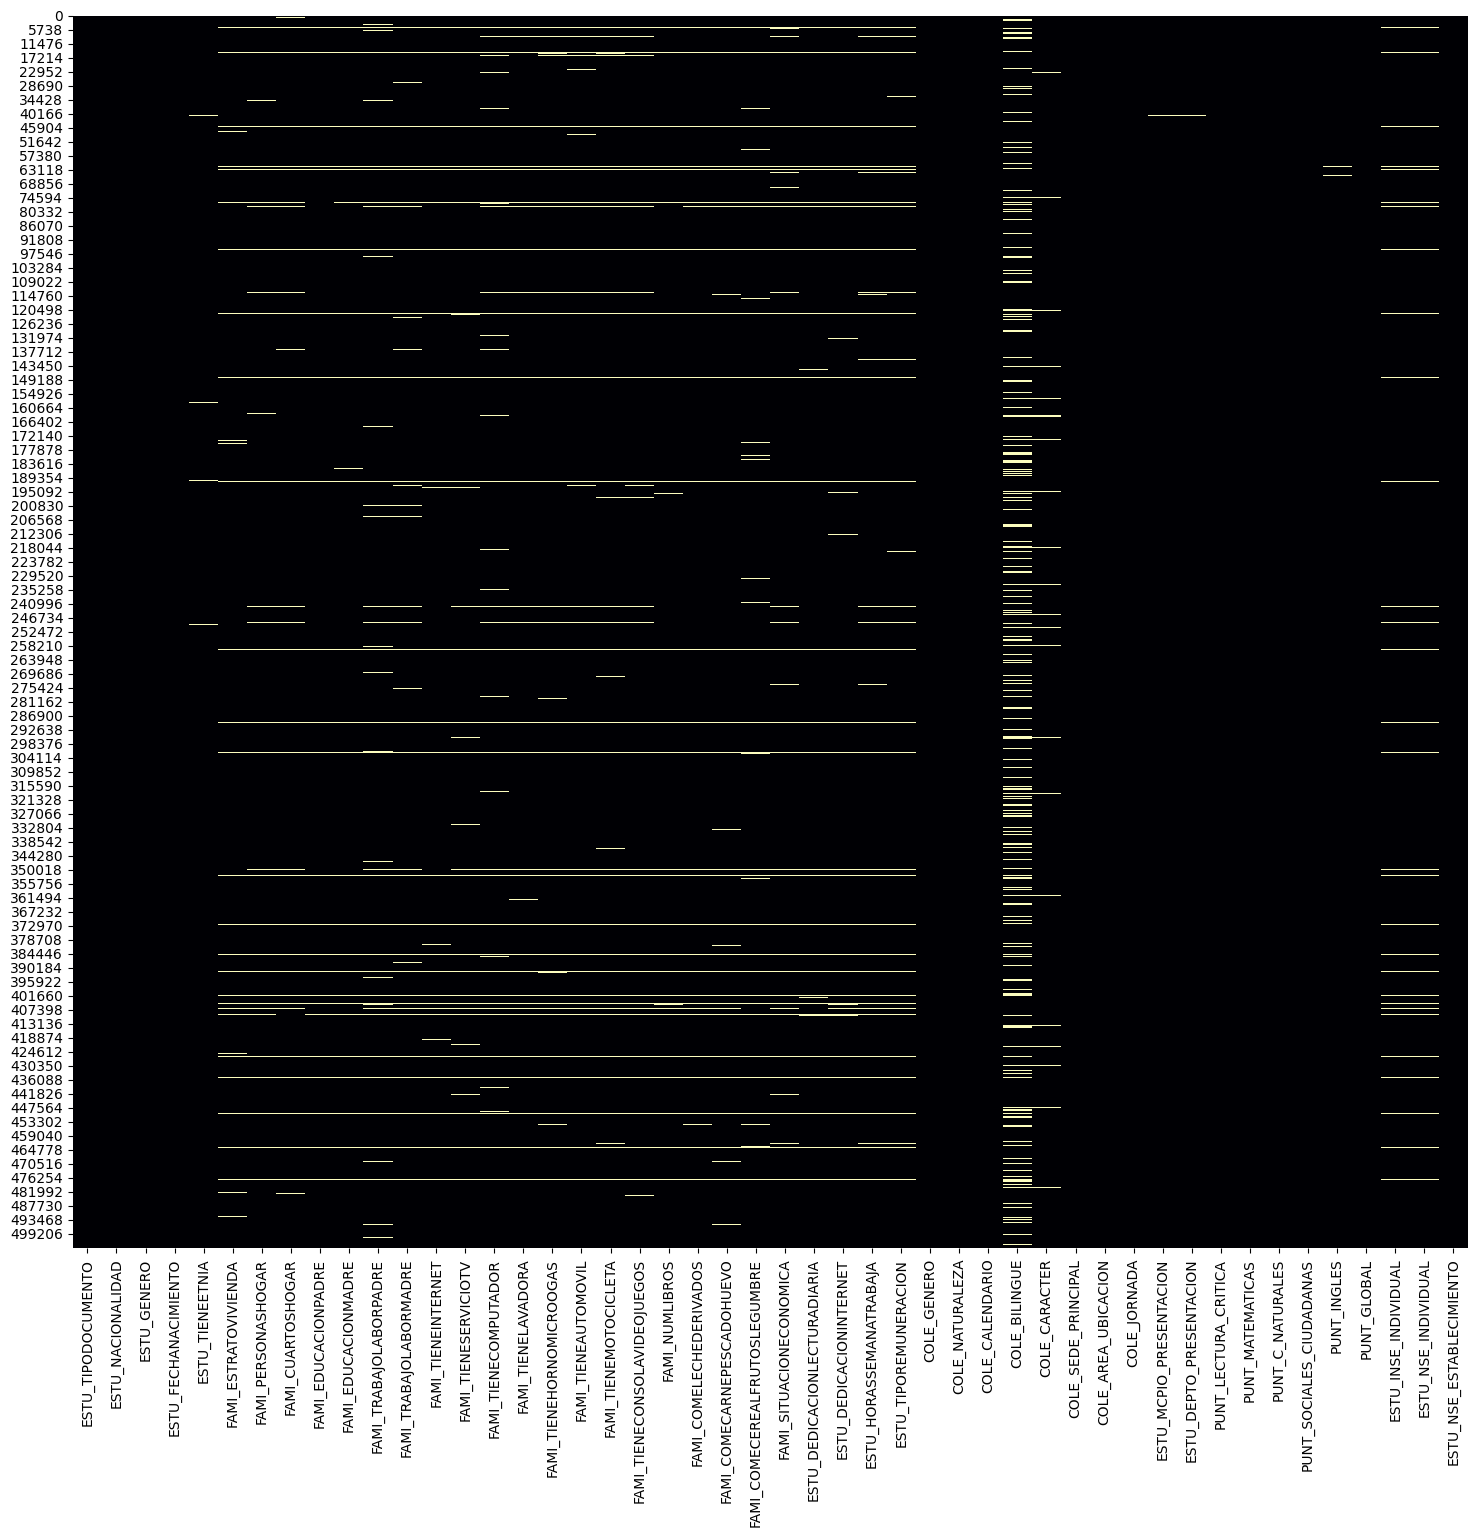

In [15]:
plt.figure(figsize=(18, 16))
sns.heatmap(icfes.isnull(),cmap = 'magma',cbar = False)

### 1.5 Cardinalidad de las Variables

#### Número de categorías únicas y Top 5 categorías

In [16]:
cat_vars = icfes.select_dtypes(include=['object'])

for col in cat_vars.columns:
    print(f"\nVariable: {col} ({cat_vars[col].nunique()} categorías únicas)")
    print(cat_vars[col].value_counts().head(5))  # top 5 categorías


Variable: ESTU_TIPODOCUMENTO (11 categorías únicas)
ESTU_TIPODOCUMENTO
TI     413514
CC      83373
CR       4923
NES      1454
CE       1096
Name: count, dtype: int64

Variable: ESTU_NACIONALIDAD (47 categorías únicas)
ESTU_NACIONALIDAD
COLOMBIA          501708
VENEZUELA           2927
ESTADOS UNIDOS        46
ECUADOR               37
ESPAÑA                29
Name: count, dtype: int64

Variable: ESTU_GENERO (2 categorías únicas)
ESTU_GENERO
F    276572
M    228292
Name: count, dtype: int64

Variable: ESTU_TIENEETNIA (2 categorías únicas)
ESTU_TIENEETNIA
No    469938
Si     31941
Name: count, dtype: int64

Variable: FAMI_ESTRATOVIVIENDA (7 categorías únicas)
FAMI_ESTRATOVIVIENDA
Estrato 2      182322
Estrato 1      152852
Estrato 3      103550
Estrato 4       23463
Sin Estrato     15631
Name: count, dtype: int64

Variable: FAMI_PERSONASHOGAR (5 categorías únicas)
FAMI_PERSONASHOGAR
3 a 4      240082
5 a 6      155486
7 a 8       41144
1 a 2       36691
9 o más     16296
Name: count, dt

#### Porcentaje relativo de cada categoría en variables categóricas

In [17]:
for col in cat_vars:
    print(f"\nDistribución porcentual de '{col}':")
    print(icfes[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%')


Distribución porcentual de 'ESTU_TIPODOCUMENTO':
ESTU_TIPODOCUMENTO
TI      81.905%
CC      16.514%
CR       0.975%
NES      0.288%
CE       0.217%
PEP      0.083%
PE       0.015%
RC       0.003%
PC       0.001%
V          0.0%
NUIP       0.0%
Name: proportion, dtype: object

Distribución porcentual de 'ESTU_NACIONALIDAD':
ESTU_NACIONALIDAD
COLOMBIA                           99.373%
VENEZUELA                            0.58%
ESTADOS UNIDOS                      0.009%
ECUADOR                             0.007%
ESPAÑA                              0.006%
CUBA                                0.002%
PERÚ                                0.002%
ARGENTINA                           0.002%
BRASIL                              0.002%
COSTA RICA                          0.001%
VANUATU                             0.001%
PANAMÁ                              0.001%
MÉXICO                              0.001%
URUGUAY                             0.001%
GUATEMALA                           0.001%
HONDURAS   

### 1.6 Resumen Final

---

#### **Número de Variables**

Se eliminaron variables que no aportan nada al entrenamiento del modelo. La selección de las variables es arbitraria y por conocimiento de los datos.

Entre las variables descartadas se incluyen:
- **`PERIODO`** → Año de presentación del examen (2020), es el mismo para todos.
- **Códigos del DANE** (departamentos, colegios, etc.) → No tienen valor predictivo.
- **Departamentos y Municipios** → Por redundancia, se eliminaron departamentos y municipios de residencia del estudiante y ubicación del colegio, se dejó solamente el municipio y departamento donde se presentó el examen
- **Datos personales o administrativos** → Tipo de documento, país de residencia (no nacionalidad), condición de reclusión, proceso judicial.  
- **`ESTU_GENERACIONE` (beca)** → Representa *data leakage*, pues depende directamente del puntaje obtenido en el examen.

---

#### **Dimensiones del Dataset**

Después de la depuración, el dataset queda conformado por:

- **504.872 observaciones (filas)**  
- **59 variables (columnas)**  

---

#### **Tipos de Variables**

El dataset contiene tres tipos principales de variables:

| Tipo de Variable | Cantidad |
|------------------|-----------|
| Numéricas        | 20        |
| Categóricas      | 39        |
| **Total**        | 59        |

---

#### **Cardinalidad de Variables Categóricas**

Las variables con **mayor cardinalidad** son aquellas con **componente geográfico**, como:

- Municipio y departamento de residencia.  
- Variables de pertenencia étnica.  
- Actividad laboral de los padres del estudiante.  
- Nivel educativo de los padres.

---

#### **Valores Faltantes**

- Se identificaron **133,046 filas con al menos un valor nulo**.
- Hay **12,097 filas** con el 40% de datos faltantes.
- Las variables con **más valores faltantes** corresponden principalmente a **preguntas de consumo o uso de recursos**, como:
  - Tiempo dedicado a Internet.  
  - Consumo de cereales, carne o productos lácteos.  

> Este análisis es preliminar: solo considera el conteo de valores nulos.  
> Sin embargo, a priori, muchos parecen ser **faltantes MAR (Missing At Random)**.  
> Por ejemplo, la ausencia de respuesta en “tiempo dedicado a Internet” puede deberse a que el hogar **no posee conexión o dispositivos**.

---

✅ **Resumen General**

| Aspecto                     | Resultado |
|-----------------------------|------------|
| Observaciones               | 504,872    |
| Variables totales           | 59         |
| Variables numéricas          | 20         |
| Variables categóricas        | 39         |
| Filas con valores nulos     | 133,046    |

---

### 1.7 Guardar Archivo 

In [18]:
from funciones_save_load import guardar_parquet

guardar_parquet(icfes, "icfes_carga_inicial.parquet")

Archivo guardado en la carpeta data con el nombre de icfes_carga_inicial.parquet
